In [54]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset Collection

### Here, Downloading the shoes data from the url and storing in a dataframe.

In [3]:
df, info = tfds.load('amazon_us_reviews/Shoes_v1_00', split='train[-100:]', with_info=True)
# df, info = tfds.load('amazon_us_reviews/Shoes_v1_00', split='train[:1000]', with_info=True,num_parallel_reads=16)

# subset_dataset = tfds.Subset(df, range(1000))  # Extract first 1000 examples

In [4]:
dfr = tfds.as_dataframe(df)

In [5]:
dfr.head(5)

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'4409538',0,b'US',b'Shoes',b'B004J2OCZY',b'955479405',"b""Merrell Men's Encore Bypass Slip-On Shoe""",b'last pair were right on the money...these se...,b'2015-08-18',b'Four Stars',b'R2ABN30IOZ0NJ3',4,0,0,1
1,b'44853959',0,b'US',b'Shoes',b'B0011YEMDK',b'745610224',b'Superfeet BLUE Full Length Insole',"b""My arch in my left foot has been bothering m...",b'2014-03-09',b'Blue superfeet are the answer',b'R28R220CCVCUDG',5,0,0,1
2,b'19310140',0,b'US',b'Shoes',b'B00KAFPCQ2',b'772491256',"b""Corky's Elite - Women's Boulder Red Slip On ...",b'I love them! Very cute and comfortable. Mayb...,b'2015-08-01',"b""Corky's""",b'RIN6D0UOC3EN5',4,0,0,1
3,b'41841231',0,b'US',b'Shoes',b'B00K1E9R5O',b'370324688',"b""Michael Antonio Women's Menlow Boot""","b""I get so many compliments on these! I got th...",b'2015-04-07',b'I like that they look like combat boots with...,b'R15HFZFMKZXCVT',4,0,0,1
4,b'17637387',0,b'US',b'Shoes',b'B00GV3VK0Y',b'888832774',"b""PUMA Men's Future Cat S1 Overtake Motorsport...",b'Nice Puma shoes',b'2014-09-15',b'Five Stars',b'R2U001SK1VG9V6',5,2,0,1


### Dataset Description

customer_id: unique identifier for each customer

helpful_votes: number of helpful votes for the review

marketplace: the Amazon marketplace where the review was written (US)

product_category: category of the product (Shoes)

product_id: product unique identifier

product_parent: parent product identifier (used to group together variations of the same product)

product_title: title of the product

review_body: body part of the review

review_date: date the review was written

review_headline: headline of the review

review_id: review unique identifier

star_rating: rating given by the customer (1-5 stars)

total_votes: total number of votes for the review (i.e helpful and unhelpful)

verified_purchase: whether or not the product is purchased from Amazon and the review is verified

vine: whether or not the review was in Vine program (where customers receive free products in exchange for reviews)

### Storing the extracted last 20000 rows from the shoes dataset in the CSV file.

In [6]:
# dfr.to_csv("shoes_practice.csv",index=False)

### Loading data from the csv file

In [7]:
df = pd.read_csv("shoes_practice.csv")

## 1.1 Querying the data / Dataset Preview

In [8]:
df.head(5)

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'26846268',0,b'US',b'Shoes',b'B002EL3KWS',b'169172080',b'PUMA Speeder Illuminescent V Light Up Sneake...,b'These shoes are so adoreable. They are of go...,b'2012-12-28',"b'Great Price, Love these!'",b'R2QQTV19XDB6IC',5,0,0,1
1,b'25960125',1,b'US',b'Shoes',b'B0054DO16W',b'543323240',b'Nike Air Max 95 (GS) Big Kids Running Shoes ...,"b""I loved the sneakers but I had to send them ...",b'2011-09-12',b'Not too happy..',b'R1HDXT15X6II4C',3,1,0,1
2,b'11086779',0,b'US',b'Shoes',b'B005HER2CI',b'56595624',"b""Harley-Davidson Men's Paladin Boot""",b'need i say more as harley makes an excellent...,b'2013-08-28',b'harley boots',b'RYSGRKSV8M187',5,0,0,1
3,b'8900713',0,b'US',b'Shoes',b'B010UQ1VCY',b'979185488',"b""Latasa Women's Fashion Chunky Mid-heel Slip-...",b'Love it',b'2015-08-17',b'comfortable shoes',b'R17S5LGCYBJ700',5,1,0,1
4,b'41547974',0,b'US',b'Shoes',b'B009CF2H8W',b'892647298',b'Ray-Ban 0RB4187 Square Sunglasses',b'Really nice ones.',b'2015-04-13',b'Five Stars',b'R242WB1KEDWYZY',5,0,0,1


In [9]:
df.tail(5)

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
995,b'11063331',0,b'US',b'Shoes',b'B005PLM016',b'804246440',"b""Fila Women's Skele-Toes EZ Slide Shoe""",b'I love them a lot and recommend them to my f...,b'2012-11-06',b'MsPrissy',b'R2DNZYMLY5JT69',5,0,0,1
996,b'80829',0,b'US',b'Shoes',b'B00FWW0ZSI',b'734310501',"b""Very Volatile Women's Rockaway Wedge Sandal""",b'Very stylish. I can dress them up or dress ...,b'2015-03-31',b'Very stylish. I can dress them up or dress ...',b'R3DDLSHSRV1R5U',4,0,0,1
997,b'38953442',0,b'US',b'Shoes',b'B000I6ZXTE',b'357804452',"b""Charles David Women's Elsa Ankle Boot""","b""Given that I wear high heels on a daily basi...",b'2007-10-16',b'Gorgeous and comfortable!',b'R37DEZWATTM0CA',5,0,0,1
998,b'22683249',0,b'US',b'Shoes',b'B000EP6OUQ',b'27136041',"b""Sperry Top-Sider Men's Billfish 3-Eye Boat S...",b'Given as a gift and were just what I expected!',b'2015-03-03',b'Five Stars',b'R6JYMC8402NEB',5,0,0,1
999,b'42820972',0,b'US',b'Shoes',b'B000WGAW50',b'514002090',b'The Original MuckBoots Daily Garden Shoe',b'My husband absolutely loves these garden boo...,b'2013-10-13',b'Awesome',b'R3DXCHSBV6PV29',5,0,0,1


## 1.2 Descriptive Analysis / Summary statistics
Checking total number of rows and columns

In [10]:
df_rows, df_columns = df.shape
print(f"Dataset has {df_rows} rows and {df_columns} columns.")

Dataset has 1000 rows and 15 columns.


In [11]:
df.describe()

,data/helpful_votes,data/star_rating,data/total_votes,data/verified_purchase,data/vine
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,0.981000,4.306000,1.179000,0.103000,1.0
std,7.068989,1.095246,7.464226,0.304111,0.0
min,0.000000,1.000000,0.000000,0.000000,1.0
25%,0.000000,4.000000,0.000000,0.000000,1.0
50%,0.000000,5.000000,0.000000,0.000000,1.0
75%,0.000000,5.000000,1.000000,0.000000,1.0
max,164.000000,5.000000,168.000000,1.000000,1.0


## 1.3 Data Cleaning
 In this step, we are modifying the original column names to make them more readable and relevant to our analysis.

In [12]:
df.columns

Index(['data/customer_id', 'data/helpful_votes', 'data/marketplace',
       'data/product_category', 'data/product_id', 'data/product_parent',
       'data/product_title', 'data/review_body', 'data/review_date',
       'data/review_headline', 'data/review_id', 'data/star_rating',
       'data/total_votes', 'data/verified_purchase', 'data/vine'],
      dtype='object')

In [13]:
df = df.rename(columns={'data/customer_id' : 'customer_id',
                        'data/helpful_votes' : 'helpful_votes', 
                        'data/marketplace':'marketplace',
                        'data/product_category':'product_category', 
                        'data/product_id':'product_id', 
                        'data/product_parent':'product_parent',
                        'data/product_title':'product_title', 
                        'data/review_body':'review_body',
                        'data/review_date':'review_date',
                        'data/review_headline':'review_headline',
                        'data/review_id':'review_id',
                        'data/star_rating':'star_rating',
                        'data/total_votes':'total_votes',
                        'data/verified_purchase':'verified_purchase',
                        'data/vine':'vine'
                       })

In [14]:
df.head(2)

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
0,b'26846268',0,b'US',b'Shoes',b'B002EL3KWS',b'169172080',b'PUMA Speeder Illuminescent V Light Up Sneake...,b'These shoes are so adoreable. They are of go...,b'2012-12-28',"b'Great Price, Love these!'",b'R2QQTV19XDB6IC',5,0,0,1
1,b'25960125',1,b'US',b'Shoes',b'B0054DO16W',b'543323240',b'Nike Air Max 95 (GS) Big Kids Running Shoes ...,"b""I loved the sneakers but I had to send them ...",b'2011-09-12',b'Not too happy..',b'R1HDXT15X6II4C',3,1,0,1


### Here, in the dataset we can clearly see that most of the columns has the row starting with the value 'b' prefix. The error related to 'b""' or 'b'' in the dataframe columns is caused by the fact that some of the values in the columns are byte strings. These byte strings need to be converted to regular strings.

### Querying the columns data before cleaning

In [15]:
df[['customer_id','product_title','review_body']]

,customer_id,product_title,review_body
0,b'26846268',b'PUMA Speeder Illuminescent V Light Up Sneake...,b'These shoes are so adoreable. They are of go...
1,b'25960125',b'Nike Air Max 95 (GS) Big Kids Running Shoes ...,"b""I loved the sneakers but I had to send them ..."
2,b'11086779',"b""Harley-Davidson Men's Paladin Boot""",b'need i say more as harley makes an excellent...
3,b'8900713',"b""Latasa Women's Fashion Chunky Mid-heel Slip-...",b'Love it'
4,b'41547974',b'Ray-Ban 0RB4187 Square Sunglasses',b'Really nice ones.'
...,...,...,...
995,b'11063331',"b""Fila Women's Skele-Toes EZ Slide Shoe""",b'I love them a lot and recommend them to my f...
996,b'80829',"b""Very Volatile Women's Rockaway Wedge Sandal""",b'Very stylish. I can dress them up or dress ...
997,b'38953442',"b""Charles David Women's Elsa Ankle Boot""","b""Given that I wear high heels on a daily basi..."
998,b'22683249',"b""Sperry Top-Sider Men's Billfish 3-Eye Boat S...",b'Given as a gift and were just what I expected!'


### Checking data types for each column

In [16]:
print(df.dtypes)

customer_id          object
helpful_votes         int64
marketplace          object
product_category     object
product_id           object
product_parent       object
product_title        object
review_body          object
review_date          object
review_headline      object
review_id            object
star_rating           int64
total_votes           int64
verified_purchase     int64
vine                  int64
dtype: object


### Applying the regular expression to clean each row for whole dataset except five columns 'helpful_votes', 'star_rating', 'total_votes', 'verified_purchase', and 'vine'

In [17]:
import re

# RE to match the 'b' prefix
pattern = re.compile(r"^b['\"](.*)['\"]$")

# column names that donot have 'b' prefix
int_columns = ['helpful_votes', 'star_rating', 'total_votes', 'verified_purchase', 'vine']

# Apply pattern to each element of the dataframe
for col in df.columns:
    if col not in int_columns:
        df[col] = df[col].apply(lambda x: pattern.match(x).group(1) if isinstance(x, str) and pattern.match(x) else x)


In [18]:
# df = df.applymap(lambda x: x.decode('utf-8').strip("b'") if isinstance(x, bytes) else str(x).strip("b''"))

In [19]:
df.head(5)

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
0,26846268,0,US,Shoes,B002EL3KWS,169172080,PUMA Speeder Illuminescent V Light Up Sneaker ...,These shoes are so adoreable. They are of good...,2012-12-28,"Great Price, Love these!",R2QQTV19XDB6IC,5,0,0,1
1,25960125,1,US,Shoes,B0054DO16W,543323240,Nike Air Max 95 (GS) Big Kids Running Shoes [3...,I loved the sneakers but I had to send them ba...,2011-09-12,Not too happy..,R1HDXT15X6II4C,3,1,0,1
2,11086779,0,US,Shoes,B005HER2CI,56595624,Harley-Davidson Men's Paladin Boot,need i say more as harley makes an excellent b...,2013-08-28,harley boots,RYSGRKSV8M187,5,0,0,1
3,8900713,0,US,Shoes,B010UQ1VCY,979185488,Latasa Women's Fashion Chunky Mid-heel Slip-on...,Love it,2015-08-17,comfortable shoes,R17S5LGCYBJ700,5,1,0,1
4,41547974,0,US,Shoes,B009CF2H8W,892647298,Ray-Ban 0RB4187 Square Sunglasses,Really nice ones.,2015-04-13,Five Stars,R242WB1KEDWYZY,5,0,0,1


In [20]:
df['product_title']

0      PUMA Speeder Illuminescent V Light Up Sneaker ...
1      Nike Air Max 95 (GS) Big Kids Running Shoes [3...
2                     Harley-Davidson Men's Paladin Boot
3      Latasa Women's Fashion Chunky Mid-heel Slip-on...
4                      Ray-Ban 0RB4187 Square Sunglasses
                             ...                        
995                Fila Women's Skele-Toes EZ Slide Shoe
996          Very Volatile Women's Rockaway Wedge Sandal
997                Charles David Women's Elsa Ankle Boot
998      Sperry Top-Sider Men's Billfish 3-Eye Boat Shoe
999             The Original MuckBoots Daily Garden Shoe
Name: product_title, Length: 1000, dtype: object

## 1.3 Check for null Values

**Compute Ratio**

$$ R_{m} = \frac{Number \, of \, missing \, values}{ Total \, number \, of \, values} $$

<br>

In this step, a verification of NaN values must be done. According to the previous formula, if the $R_{m}$ is too high, it is better to delete the entire column. If $R_{m}$ is low, it is recommended to impute NaN values with the mean, median or mode.

In [21]:
df.isnull().sum()

customer_id          0
helpful_votes        0
marketplace          0
product_category     0
product_id           0
product_parent       0
product_title        0
review_body          0
review_date          0
review_headline      0
review_id            0
star_rating          0
total_votes          0
verified_purchase    0
vine                 0
dtype: int64

There are no null values in this dataset. Applying the compute ration formula to show a $R_{m} = 0$ for each numerical feature.

In [22]:
def compute_ratio(dataset, columns):

  Rms = {}
  for col in columns:
    Rm = dataset[col].isnull().sum() / dataset[col].count()
    Rms[col] = Rm

  Rms = pd.DataFrame(Rms.items(), columns=['Feature', 'Rm'])

  return Rms 

In [23]:
Rms = compute_ratio(df, df.columns)
Rms

,Feature,Rm
0,customer_id,0.0
1,helpful_votes,0.0
2,marketplace,0.0
3,product_category,0.0
4,product_id,0.0
5,product_parent,0.0
6,product_title,0.0
7,review_body,0.0
8,review_date,0.0
9,review_headline,0.0


# 2 Data Preprocessing

## 2.1 Check Duplicates

In [24]:
duplicate_df = df[df.duplicated(keep=False)]
print(duplicate_df)

Empty DataFrame
Columns: [customer_id, helpful_votes, marketplace, product_category, product_id, product_parent, product_title, review_body, review_date, review_headline, review_id, star_rating, total_votes, verified_purchase, vine]
Index: []


### While checking for the whole dataframe there are no duplicate values.

In [25]:
df_duplicates = df[df.duplicated(subset=['product_id'], keep=False)]
print(f"Total number of duplicated items is :{len(df_duplicates)}")
df_duplicates.head(5)

Total number of duplicated items is :2


,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
105,34996998,0,US,Shoes,B0090UGHEY,973565520,Ginkgo Store Fashion Women Korea Simple Style ...,I like.,2014-09-30,Four Stars,R3ANKXRZ052B59,4,0,1,1
465,38128543,0,US,Shoes,B0090UGHEY,973565520,Ginkgo Store Fashion Women Korea Simple Style ...,Really cute but not big enough.,2015-06-10,Four Stars,RIJ6Q67HPPSV9,4,0,0,1


In [26]:
df[df['product_id'] == 'B00H3QNDEE']

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine


### although it seems like the data is duplicated having the same product id but actually it is the review for the same product from different customers. So we do not need to remove these columns.

In [27]:
df[df['total_votes']>150]

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
294,12684301,164,US,Shoes,B0097O0FZ0,915657171,FitFlop Women's Lulu Thong Sandal,FitFlop seems to offer 2 different footpads wh...,2013-06-09,Disappointed,R1VABBDP4IWAAU,2,168,0,1


In [28]:
df[df['verified_purchase']==1].head(5)

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
21,1462024,0,US,Shoes,B00LT0U2KS,233668709,Tommy Hilfiger Heritage Flag Saffiano Tote Han...,"great handbag, but it was returned for another...",2014-12-29,Five Stars,R2A9MVEGO21RXN,5,0,1,1
32,14225348,6,US,Shoes,B000OV3ADE,94771573,5075 Black GI Style Combat Boot,"We are from Costa Rica, my wife were on a buss...",2012-11-18,GREAT Boots and service provided by the Staff!...,R1MFI14409KB05,5,9,1,1
35,45899900,0,US,Shoes,B0002EX2KE,60659500,"Wolverine Men\'s Waterproof Insulated 8"" Work ...",Great boot - fit as expected. Good seller,2014-06-26,Great boot - fit as expected,R2UGHI475VERD,5,0,1,1
39,52605385,0,US,Shoes,B003FZA9MG,211869441,FitFlop Women's Superboot Ankle Boot,I love FitFlops. I wore my 1st pair walking ar...,2011-10-16,My 3rd pair of FitFlops!,RGYTRKV3N163P,5,0,1,1
41,48519856,0,US,Shoes,B00K5QPM02,895732857,Calvin Klein Women's Natia Boot,good,2014-12-25,Five Stars,ROARFHUVCZVKR,5,0,1,1


# 3. Feature Selection

### checking each columns whether these features are required or not

In [29]:
df.columns

Index(['customer_id', 'helpful_votes', 'marketplace', 'product_category',
       'product_id', 'product_parent', 'product_title', 'review_body',
       'review_date', 'review_headline', 'review_id', 'star_rating',
       'total_votes', 'verified_purchase', 'vine'],
      dtype='object')

In [30]:
df['marketplace'].unique()

array(['US'], dtype=object)

### since this dataset only consists the data from US, so we don't need this column.

In [31]:
df['helpful_votes'].unique()

array([  0,   1,   2,   6,  16,   4,   9,   8,   3,   7, 164,   5,  10,
        11,  37,  28,  13,  78,  33, 107,  29], dtype=int64)

In [32]:
df['product_category'].unique()

array(['Shoes'], dtype=object)

### This dataset product category is shoes for all columns so we don't need this column as well.

In [33]:
df[['review_body','review_headline']].head(5)

,review_body,review_headline
0,These shoes are so adoreable. They are of good...,"Great Price, Love these!"
1,I loved the sneakers but I had to send them ba...,Not too happy..
2,need i say more as harley makes an excellent b...,harley boots
3,Love it,comfortable shoes
4,Really nice ones.,Five Stars


### The columns review_headline consists of the heading about what is inside the body column. So we can only consider review_column for further analysis.
### Similarly, removing all the unnecessary columns that are not relevant for our analysis.

In [34]:
df = df[['customer_id','helpful_votes', 'product_id', 'product_title', 'review_body', 'review_date', 'star_rating','total_votes','verified_purchase']]
df

,customer_id,helpful_votes,product_id,product_title,review_body,review_date,star_rating,total_votes,verified_purchase
0,26846268,0,B002EL3KWS,PUMA Speeder Illuminescent V Light Up Sneaker ...,These shoes are so adoreable. They are of good...,2012-12-28,5,0,0
1,25960125,1,B0054DO16W,Nike Air Max 95 (GS) Big Kids Running Shoes [3...,I loved the sneakers but I had to send them ba...,2011-09-12,3,1,0
2,11086779,0,B005HER2CI,Harley-Davidson Men's Paladin Boot,need i say more as harley makes an excellent b...,2013-08-28,5,0,0
3,8900713,0,B010UQ1VCY,Latasa Women's Fashion Chunky Mid-heel Slip-on...,Love it,2015-08-17,5,1,0
4,41547974,0,B009CF2H8W,Ray-Ban 0RB4187 Square Sunglasses,Really nice ones.,2015-04-13,5,0,0
...,...,...,...,...,...,...,...,...,...
995,11063331,0,B005PLM016,Fila Women's Skele-Toes EZ Slide Shoe,I love them a lot and recommend them to my fri...,2012-11-06,5,0,0
996,80829,0,B00FWW0ZSI,Very Volatile Women's Rockaway Wedge Sandal,Very stylish. I can dress them up or dress th...,2015-03-31,4,0,0
997,38953442,0,B000I6ZXTE,Charles David Women's Elsa Ankle Boot,"Given that I wear high heels on a daily basis,...",2007-10-16,5,0,0
998,22683249,0,B000EP6OUQ,Sperry Top-Sider Men's Billfish 3-Eye Boat Shoe,Given as a gift and were just what I expected!,2015-03-03,5,0,0


### After performing data cleaning and preprocessing, 6 columns are removed from the dataframe.

In [35]:
df[df['verified_purchase']==1]

,customer_id,helpful_votes,product_id,product_title,review_body,review_date,star_rating,total_votes,verified_purchase
21,1462024,0,B00LT0U2KS,Tommy Hilfiger Heritage Flag Saffiano Tote Han...,"great handbag, but it was returned for another...",2014-12-29,5,0,1
32,14225348,6,B000OV3ADE,5075 Black GI Style Combat Boot,"We are from Costa Rica, my wife were on a buss...",2012-11-18,5,9,1
35,45899900,0,B0002EX2KE,"Wolverine Men\'s Waterproof Insulated 8"" Work ...",Great boot - fit as expected. Good seller,2014-06-26,5,0,1
39,52605385,0,B003FZA9MG,FitFlop Women's Superboot Ankle Boot,I love FitFlops. I wore my 1st pair walking ar...,2011-10-16,5,0,1
41,48519856,0,B00K5QPM02,Calvin Klein Women's Natia Boot,good,2014-12-25,5,0,1
...,...,...,...,...,...,...,...,...,...
958,11364124,0,B00849DKZG,Teva Men's Jetter Sandal,I purchased a pair of these 2 years ago from a...,2014-08-25,5,0,1
959,21197493,3,B008TSNOHG,Dunham Men's Windward Slip-On,"Great men's shoe, but was purposely shopping f...",2013-12-22,3,3,1
962,22753983,0,B00BLS29PO,Sanrio Kids Girls' Hello Kitty Character Print...,"It's a little large, it shouldn't even say 11-...",2014-06-24,3,0,1
963,29595308,1,B00D8GXXZ2,New Balance Women's WR00 Minimus Running Shoe,I am in need of a new running shoe and thought...,2014-07-01,3,2,1


In [36]:
df[df["product_id"]=="B00H3QNDEE"].count()[0] > 1

False

In [37]:
def f(record):
    if record.count()[0] > 1:
        return record

df.groupby("product_id").apply(f)

customer_id  helpful_votes  product_id  \
product_id                                              
B0090UGHEY 105    34996998              0  B0090UGHEY   
           465    38128543              0  B0090UGHEY   

                                                    product_title  \
product_id                                                          
B0090UGHEY 105  Ginkgo Store Fashion Women Korea Simple Style ...   
           465  Ginkgo Store Fashion Women Korea Simple Style ...   

                                    review_body review_date  star_rating  \
product_id                                                                 
B0090UGHEY 105                          I like.  2014-09-30            4   
           465  Really cute but not big enough.  2015-06-10            4   

                total_votes  verified_purchase  
product_id                                      
B0090UGHEY 105            0                  1  
           465            0                  0

In [38]:
df.columns

Index(['customer_id', 'helpful_votes', 'product_id', 'product_title',
       'review_body', 'review_date', 'star_rating', 'total_votes',
       'verified_purchase'],
      dtype='object')

In [39]:
# dfr[dfr['product_parent']=="b'445329524'"]

# 4. Text Preprocessing

In [40]:
df_text = df[['review_body']].copy()
df_text

,review_body
0,These shoes are so adoreable. They are of good...
1,I loved the sneakers but I had to send them ba...
2,need i say more as harley makes an excellent b...
3,Love it
4,Really nice ones.
...,...
995,I love them a lot and recommend them to my fri...
996,Very stylish. I can dress them up or dress th...
997,"Given that I wear high heels on a daily basis,..."
998,Given as a gift and were just what I expected!


In [41]:
type(df_text)

pandas.core.frame.DataFrame

## Importing additional libraries

In [42]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## 4.1 convert string to lowercase

In [43]:
df_text['review_body'] = df_text['review_body'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df_text['review_body'] = df_text['review_body'].str.lower()

## 4.2 Tokenization

In [44]:
def words_tokenize(sentence):
    tokens = word_tokenize(sentence)
    return tokens

df_text['tokens'] = df_text['review_body'].apply(lambda x: words_tokenize(x))

In [45]:
df_text

,review_body,tokens
0,these shoes are so adoreable they are of good ...,"[these, shoes, are, so, adoreable, they, are, ..."
1,i loved the sneakers but i had to send them ba...,"[i, loved, the, sneakers, but, i, had, to, sen..."
2,need i say more as harley makes an excellent b...,"[need, i, say, more, as, harley, makes, an, ex..."
3,love it,"[love, it]"
4,really nice ones,"[really, nice, ones]"
...,...,...
995,i love them a lot and recommend them to my fri...,"[i, love, them, a, lot, and, recommend, them, ..."
996,very stylish i can dress them up or dress the...,"[very, stylish, i, can, dress, them, up, or, d..."
997,given that i wear high heels on a daily basis ...,"[given, that, i, wear, high, heels, on, a, dai..."
998,given as a gift and were just what i expected,"[given, as, a, gift, and, were, just, what, i,..."


## 4.3 Lemmatization

In [46]:
def lemmatize(tokens):
    lemmas = []
    for token in tokens:
        lemma = WordNetLemmatizer().lemmatize(token)
        if len(lemma) > 1 and not lemma.isnumeric():
            lemmas.append(lemma)
    return lemmas
df_text['lemmas'] = df_text['tokens'].apply(lambda x: lemmatize(x))

In [47]:
df_text

,review_body,tokens,lemmas
0,these shoes are so adoreable they are of good ...,"[these, shoes, are, so, adoreable, they, are, ...","[these, shoe, are, so, adoreable, they, are, o..."
1,i loved the sneakers but i had to send them ba...,"[i, loved, the, sneakers, but, i, had, to, sen...","[loved, the, sneaker, but, had, to, send, them..."
2,need i say more as harley makes an excellent b...,"[need, i, say, more, as, harley, makes, an, ex...","[need, say, more, harley, make, an, excellent,..."
3,love it,"[love, it]","[love, it]"
4,really nice ones,"[really, nice, ones]","[really, nice, one]"
...,...,...,...
995,i love them a lot and recommend them to my fri...,"[i, love, them, a, lot, and, recommend, them, ...","[love, them, lot, and, recommend, them, to, my..."
996,very stylish i can dress them up or dress the...,"[very, stylish, i, can, dress, them, up, or, d...","[very, stylish, can, dress, them, up, or, dres..."
997,given that i wear high heels on a daily basis ...,"[given, that, i, wear, high, heels, on, a, dai...","[given, that, wear, high, heel, on, daily, bas..."
998,given as a gift and were just what i expected,"[given, as, a, gift, and, were, just, what, i,...","[given, gift, and, were, just, what, expected]"


## 4.2 Stopwords removal

In [48]:
def remove_stopwords(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    filtered = [token for token in tokens if token not in stopwords]
    return filtered

In [49]:
df_text['filtered_tokens'] = df_text['lemmas'].apply(lambda x: remove_stopwords(x))
df_text.head(5)

,review_body,tokens,lemmas,filtered_tokens
0,these shoes are so adoreable they are of good ...,"[these, shoes, are, so, adoreable, they, are, ...","[these, shoe, are, so, adoreable, they, are, o...","[shoe, adoreable, good, quality, cleaned, wet,..."
1,i loved the sneakers but i had to send them ba...,"[i, loved, the, sneakers, but, i, had, to, sen...","[loved, the, sneaker, but, had, to, send, them...","[loved, sneaker, send, back, seemed, tight, ev..."
2,need i say more as harley makes an excellent b...,"[need, i, say, more, as, harley, makes, an, ex...","[need, say, more, harley, make, an, excellent,...","[need, say, harley, make, excellent, boot, fit..."
3,love it,"[love, it]","[love, it]",[love]
4,really nice ones,"[really, nice, ones]","[really, nice, one]","[really, nice, one]"


#### Here, stopwords are removed from the 'lemmas' column in a dataframe. 'filtered_tokens' column is created which contains words without stopwords.

# 5. Vectorization

#### After the data preprocessing and text preprocessing steps, the next step is to apply the word vectorization methods to convert the text data into numerical format that can be used as input to the machine learning model. The two word vectorization methods that will be compared in this analysis are CountVectorizer and TF-IDF Vectorizer

## 5.1 Count Vectorizer

### Importing additional libraries

In [51]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [52]:
# Count vectorization
count_vectorizer = CountVectorizer()
count_vectorized = count_vectorizer.fit_transform(df_text['filtered_tokens'].apply(lambda x: ' '.join(x)))

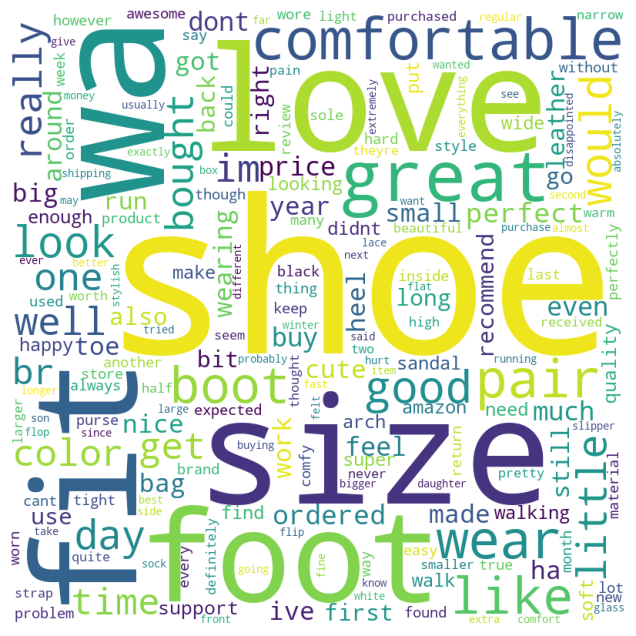

In [58]:
count_word_freq = dict(zip(count_vectorizer.get_feature_names_out(), np.asarray(count_vectorized.sum(axis=0)).ravel()))
count_wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(count_word_freq)
plt.figure(figsize=(8,8))
plt.imshow(count_wordcloud)
plt.axis('off')
plt.show()

## 5.2 TD-IDF Vectorizer